In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

# Configuración de tamaños y directorios
img_height = 32
img_width = 32
color_mode = 'grayscale'  # Escala de grises

# Definir la ruta base
base_dir = r'C:\Users\regin\OneDrive\Escritorio\AI_NUMEROS'

# Rutas de las carpetas Train y Test
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

# Configuración del generador de datos
image_generator = ImageDataGenerator(
    rescale=1./255,  # Escalar los valores de los píxeles al rango [0, 1]
    validation_split=0.2
)

batch_size = 32

# Generador de datos para entrenamiento
train_data_gen = image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generador de datos para validación
val_data_gen = image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Generador de datos para prueba
test_data_gen = image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical',
    shuffle=False
)

Found 3200 images belonging to 10 classes.
Found 796 images belonging to 10 classes.
Found 1038 images belonging to 10 classes.


Tamaño de la imagen de la clase '6': (32, 32, 1)
Tamaño de la imagen de la clase '7': (32, 32, 1)
Tamaño de la imagen de la clase '8': (32, 32, 1)
Tamaño de la imagen de la clase '3': (32, 32, 1)
Tamaño de la imagen de la clase '0': (32, 32, 1)
Tamaño de la imagen de la clase '4': (32, 32, 1)
Tamaño de la imagen de la clase '5': (32, 32, 1)
Tamaño de la imagen de la clase '9': (32, 32, 1)
Tamaño de la imagen de la clase '2': (32, 32, 1)
Tamaño de la imagen de la clase '1': (32, 32, 1)


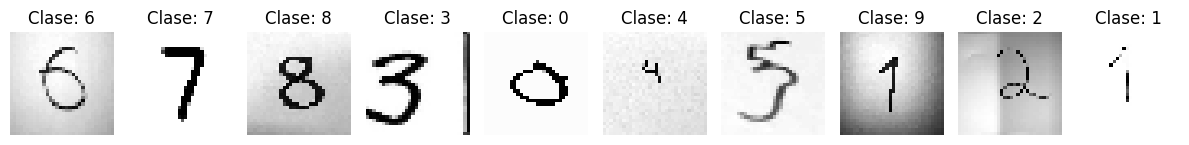

In [4]:
# Mostrar una imagen de cada clase y su tamaño
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos el diccionario de clases (nombre: índice)
class_indices = train_data_gen.class_indices
# Invertimos para mapear índice -> nombre de clase
idx_to_class = {v: k for k, v in class_indices.items()}

# Inicializamos un diccionario para almacenar una imagen por clase
images_shown = {}

# Recorremos el generador hasta obtener al menos una imagen por clase
for batch_images, batch_labels in train_data_gen:
    for img, label in zip(batch_images, batch_labels):
        class_idx = np.argmax(label)
        if class_idx not in images_shown:
            images_shown[class_idx] = img
        # Cuando ya tenemos todas las clases, salimos del bucle
        if len(images_shown) == len(class_indices):
            break
    if len(images_shown) == len(class_indices):
        break

# Mostrar las imágenes
plt.figure(figsize=(12, 4))
for i, (class_idx, img) in enumerate(images_shown.items()):
    plt.subplot(1, len(images_shown), i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Clase: {idx_to_class[class_idx]}")
    plt.axis('off')
    # Imprimir el tamaño de cada imagen
    print(f"Tamaño de la imagen de la clase '{idx_to_class[class_idx]}': {img.shape}")

plt.tight_layout()
plt.show()

Modelo común

In [13]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Definir la arquitectura del modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,674 (2.36 MB)

 Trainable params: 617,674 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear callback de EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    train_data_gen,  
    validation_data=val_data_gen, 
    epochs=30,  
    callbacks=[early_stop]
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 768ms/step - accuracy: 0.1475 - loss: 2.2706 - val_accuracy: 0.4849 - val_loss: 1.6464
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 728ms/step - accuracy: 0.5148 - loss: 1.4362 - val_accuracy: 0.6432 - val_loss: 1.2072
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 722ms/step - accuracy: 0.6891 - loss: 0.9730 - val_accuracy: 0.7399 - val_loss: 0.8782
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 634ms/step - accuracy: 0.7762 - loss: 0.6619 - val_accuracy: 0.8028 - val_loss: 0.7360
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 516ms/step - accuracy: 0.8367 - loss: 0.5126 - val_accuracy: 0.7940 - val_loss: 0.7914
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 605ms/step - accuracy: 0.8701 - loss: 0.4190 - val_accuracy: 0.8040 - val_loss: 0.7304
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 562ms/step - accuracy: 0.9056 - loss: 0.2959 - val_accuracy: 0.8229 - val_loss: 0.7291
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 626ms/step - accuracy: 0.9226 - loss: 0

In [17]:
# Guardar el modelo
model.save('model.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 379ms/step - accuracy: 0.8072 - loss: 0.8163

Accuracy en el conjunto de validación: 0.81


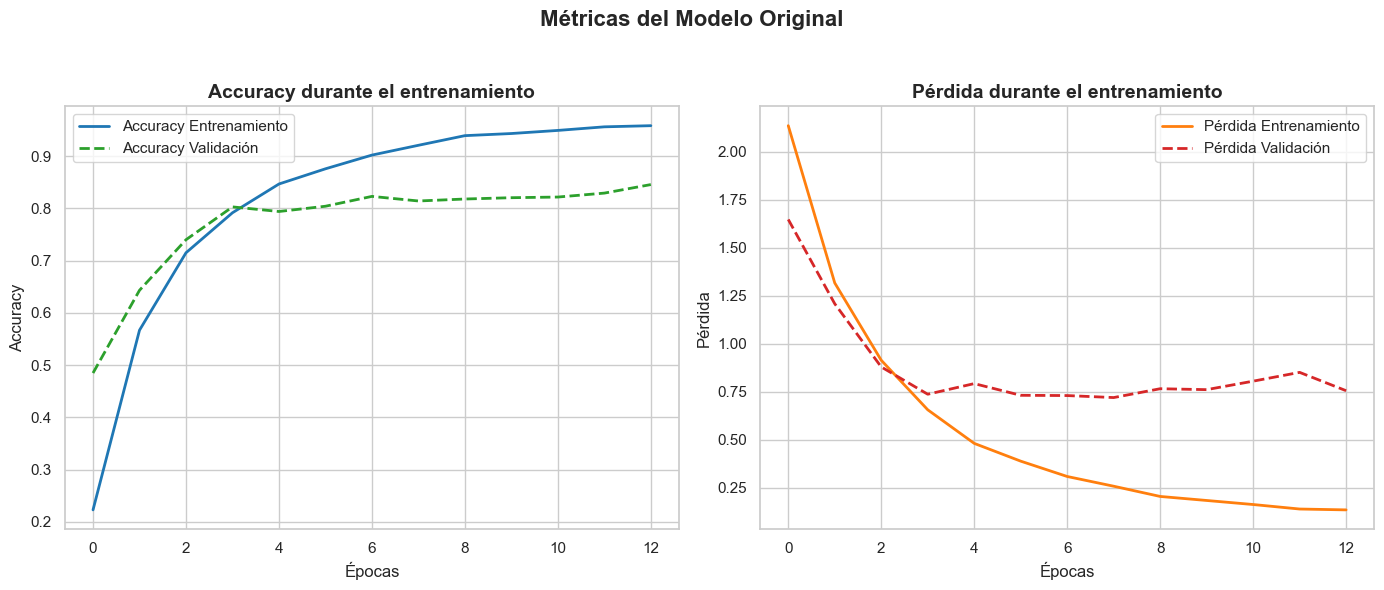

In [15]:
# Evaluar el modelo en el conjunto de validación
test_loss, validation_accuracy = model.evaluate(val_data_gen)
print(f"\nAccuracy en el conjunto de validación: {validation_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(history.history['val_accuracy'], label='Accuracy Validación', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida Validación', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo Original', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Modelo 1 (agregamos 1 capa de Dropout de 0.3, 50 epochs)

In [18]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Definir la arquitectura del modelo
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

# Configurar callbacks: EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos
)

# Entrenar el modelo con los callbacks
history1 = model1.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,  
    callbacks=[early_stop] 
)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,674 (2.36 MB)

 Trainable params: 617,674 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 716ms/step - accuracy: 0.1560 - loss: 2.2374 - val_accuracy: 0.5666 - val_loss: 1.4878
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 511ms/step - accuracy: 0.5249 - loss: 1.4700 - val_accuracy: 0.6809 - val_loss: 1.1290
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.6185 - loss: 1.1130 - val_accuracy: 0.7274 - val_loss: 0.9141
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 466ms/step - accuracy: 0.7052 - loss: 0.8481 - val_accuracy: 0.7651 - val_loss: 0.8208
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 468ms/step - accuracy: 0.7610 - loss: 0.7529 - val_accuracy: 0.8015 - val_loss: 0.7397
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.7767 - loss: 0.6825 - val_accuracy: 0.7802 - val_loss: 0.7205
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 647ms/step - accuracy: 0.7998 - loss: 0.5906 - val_accuracy: 0.8090 - val_loss: 0.6363
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 711ms/step - accuracy: 0.8272 - loss: 0

In [19]:
# Guardar el modelo
model1.save('model1.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.8443 - loss: 0.5545

Accuracy en el conjunto de validación: 0.85


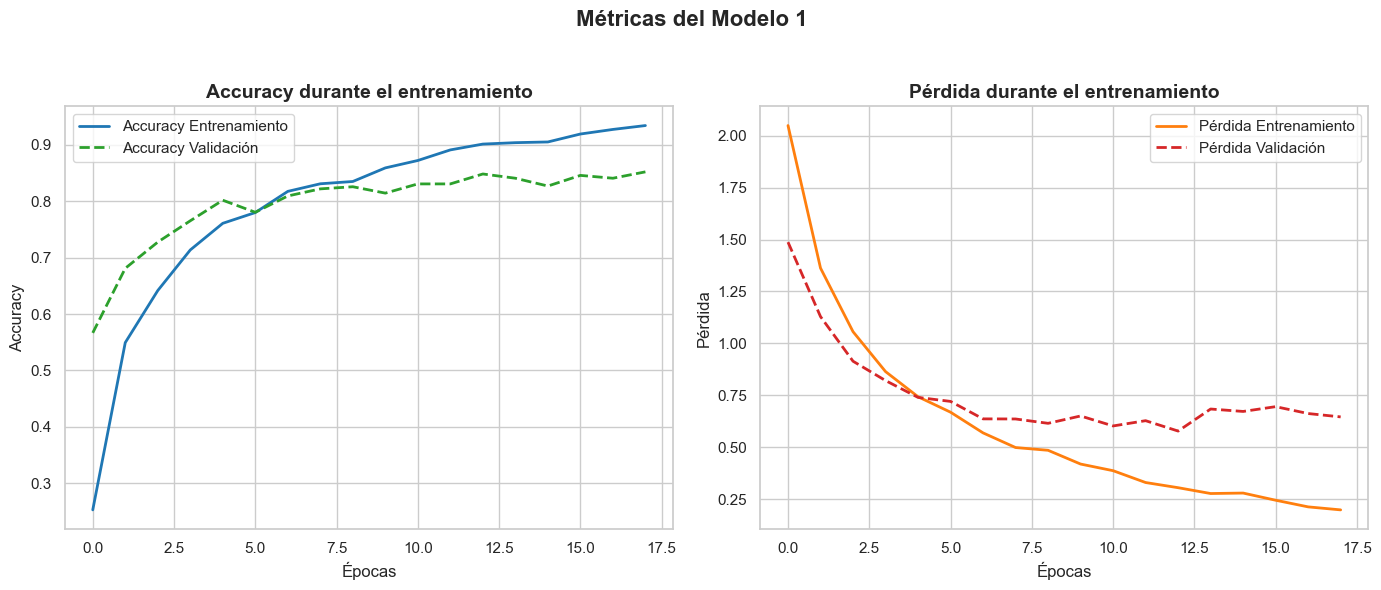

In [20]:
# Evaluar el modelo en el conjunto de validación
test_loss, validation_accuracy = model1.evaluate(val_data_gen)
print(f"\nAccuracy en el conjunto de validación: {validation_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(history1.history['val_accuracy'], label='Accuracy Validación', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(history1.history['val_loss'], label='Pérdida Validación', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo 1', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Modelo 2 (Dropout de 0.5, 50 epochs, capa Dense de 100, learning rate de 0.01)

In [21]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 clases de salida
])

# Configurar el optimizador Adam
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model2.summary()

# Configurar callbacks: EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos
)

# Entrenar el modelo con los callbacks
history2 = model2.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,  
    callbacks=[early_stop] 
)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,582 (1.14 MB)

 Trainable params: 298,582 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 593ms/step - accuracy: 0.1008 - loss: 2.3390 - val_accuracy: 0.2362 - val_loss: 2.2527
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 745ms/step - accuracy: 0.2933 - loss: 1.9981 - val_accuracy: 0.5741 - val_loss: 1.3239
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 458ms/step - accuracy: 0.5141 - loss: 1.4513 - val_accuracy: 0.5879 - val_loss: 1.3042
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 447ms/step - accuracy: 0.5742 - loss: 1.2336 - val_accuracy: 0.6520 - val_loss: 1.0105
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - accuracy: 0.6288 - loss: 1.1062 - val_accuracy: 0.7123 - val_loss: 0.8912
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 414ms/step - accuracy: 0.6866 - loss: 0.9503 - val_accuracy: 0.7525 - val_loss: 0.8033
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 570ms/step - accuracy: 0.6962 - loss: 0.8830 - val_accuracy: 0.7475 - val_loss: 0.7698
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.7162 - loss: 0

In [22]:
# Guardar el modelo
model2.save('model2.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.8158 - loss: 0.6192

Accuracy en el conjunto de validación: 0.80


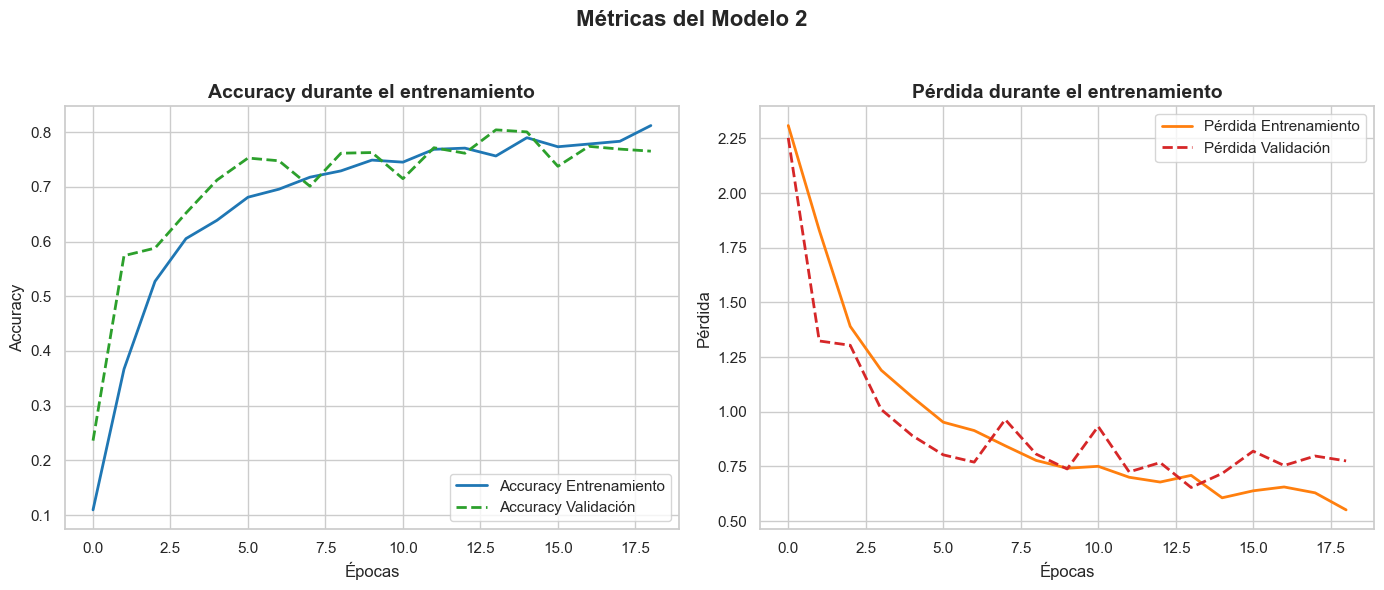

In [23]:
# Evaluar el modelo en el conjunto de validación
test_loss, validation_accuracy = model2.evaluate(val_data_gen)
print(f"\nAccuracy en el conjunto de validación: {validation_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(history2.history['val_accuracy'], label='Accuracy Validación', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(history2.history['val_loss'], label='Pérdida Validación', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo 2', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Modelo 3 (Capa dense de 128, capa de Dropout de 0.5, learning rate de 0.001, ReduceLROnPlateau, 50 epochs)

In [ ]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 clases de salida
])

# Configurar el optimizador Adam
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model3.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model3.summary()

# Configurar callbacks: EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=3,  # Reducir si no mejora en 3 épocas consecutivas
    min_lr=1e-5  # Límite inferior para la tasa de aprendizaje
)

# Entrenar el modelo con los callbacks
history3 = model3.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,  
    callbacks=[early_stop, lr_scheduler] 
)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 571ms/step - accuracy: 0.1634 - loss: 2.2159 - val_accuracy: 0.6168 - val_loss: 1.3919 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - accuracy: 0.5784 - loss: 1.3226 - val_accuracy: 0.7387 - val_loss: 0.9573 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 457ms/step - accuracy: 0.7017 - loss: 0.9067 - val_accuracy: 0.7626 - val_loss: 0.8220 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.7773 - loss: 0.6938 - val_accuracy: 0.8116 - val_loss: 0.6694 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.8242 - loss: 0.5864 - val_accuracy: 0.8078 - val_loss: 0.6546 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 428ms/step - accuracy: 0.8447 - loss: 0.4975 - val_accuracy: 0.8317 - val_loss: 0.5657 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 445ms/step - accuracy: 0.8

In [ ]:
# Guardar el modelo
model3.save('model3.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.8853 - loss: 0.4937

Accuracy en el conjunto de validación: 0.87


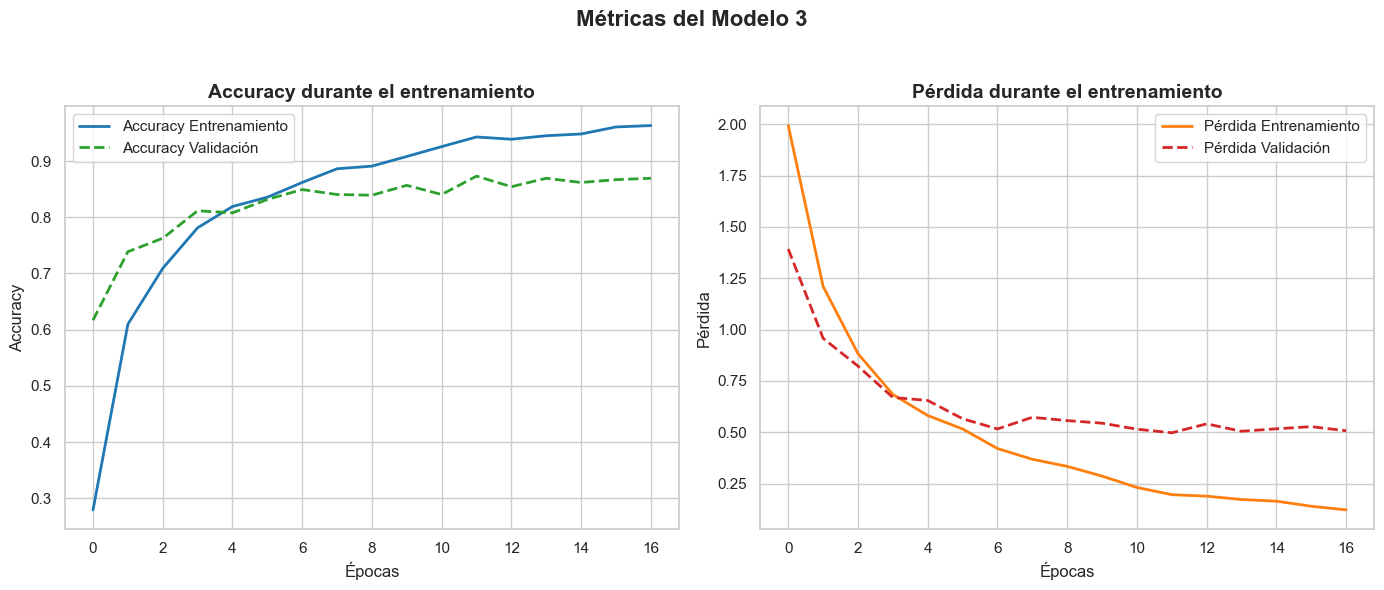

In [16]:
# Evaluar el modelo en el conjunto de validación
test_loss, validation_accuracy = model3.evaluate(val_data_gen)
print(f"\nAccuracy en el conjunto de validación: {validation_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(history3.history['val_accuracy'], label='Accuracy Validación', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(history3.history['val_loss'], label='Pérdida Validación', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo 3', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Modelo 4

In [24]:
from tensorflow.keras import models, layers, regularizers

model4 = models.Sequential([
    # Capa convolucional inicial con padding='same' para conservar tamaño espacial
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(img_height, img_width, 1)),
    # ✅ Se agregó BatchNormalization para estabilizar y acelerar el entrenamiento
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # ✅ Primer MaxPooling para reducir dimensiones espaciales
    layers.MaxPooling2D((2, 2)),
    # ✅ Se agregó Dropout temprano (0.25) para prevenir overfitting
    layers.Dropout(0.25),

    # Segundo bloque convolucional con más filtros (64)
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    # ✅ BatchNormalization nuevamente para mantener estabilidad
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    # ✅ Dropout intermedio para evitar que las capas profundas memoricen
    layers.Dropout(0.25),

    # Tercer bloque con aún más filtros (128), ideal para abstracción de alto nivel
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    
    # ✅ Se reemplazó Flatten por GlobalAveragePooling2D: menos parámetros, menos overfitting
    layers.GlobalAveragePooling2D(),

    # Capa densa con regularización L2 (weight decay)
    # ✅ Agregado kernel_regularizer para reducir overfitting
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # ✅ Dropout más fuerte (0.5) antes de la capa final
    layers.Dropout(0.5),
    # Capa de salida
    layers.Dense(10, activation='softmax')
])

# Configurar el optimizador Adam
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model4.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model4.summary()

# Configurar callbacks: EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos
)

# Valores ajustados
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=5,  # Reducir si no mejora en 5 épocas consecutivas
    min_lr=1e-8  # Límite inferior para la tasa de aprendizaje
)

# Entrenar el modelo con los callbacks
history4 = model4.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,  
    callbacks=[early_stop, lr_scheduler] 
)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,130 (1.16 MB)

 Trainable params: 304,682 (1.16 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 596ms/step - accuracy: 0.1730 - loss: 2.3812 - val_accuracy: 0.0992 - val_loss: 2.9038 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 605ms/step - accuracy: 0.5264 - loss: 1.5045 - val_accuracy: 0.1181 - val_loss: 4.0718 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 584ms/step - accuracy: 0.7335 - loss: 0.9633 - val_accuracy: 0.0992 - val_loss: 8.6320 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 583ms/step - accuracy: 0.8054 - loss: 0.7261 - val_accuracy: 0.1922 - val_loss: 3.2940 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 554ms/step - accuracy: 0.8470 - loss: 0.5787 - val_accuracy: 0.6206 - val_loss: 1.2064 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 569ms/step - accuracy: 0.8703 - loss: 0.5248 - val_accuracy: 0.8266 - val_loss: 0.7063 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 539ms/step - accuracy: 0.8

In [25]:
# Guardar el modelo
model4.save('model4.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.8390 - loss: 0.5941

Accuracy en el conjunto de validación: 0.83


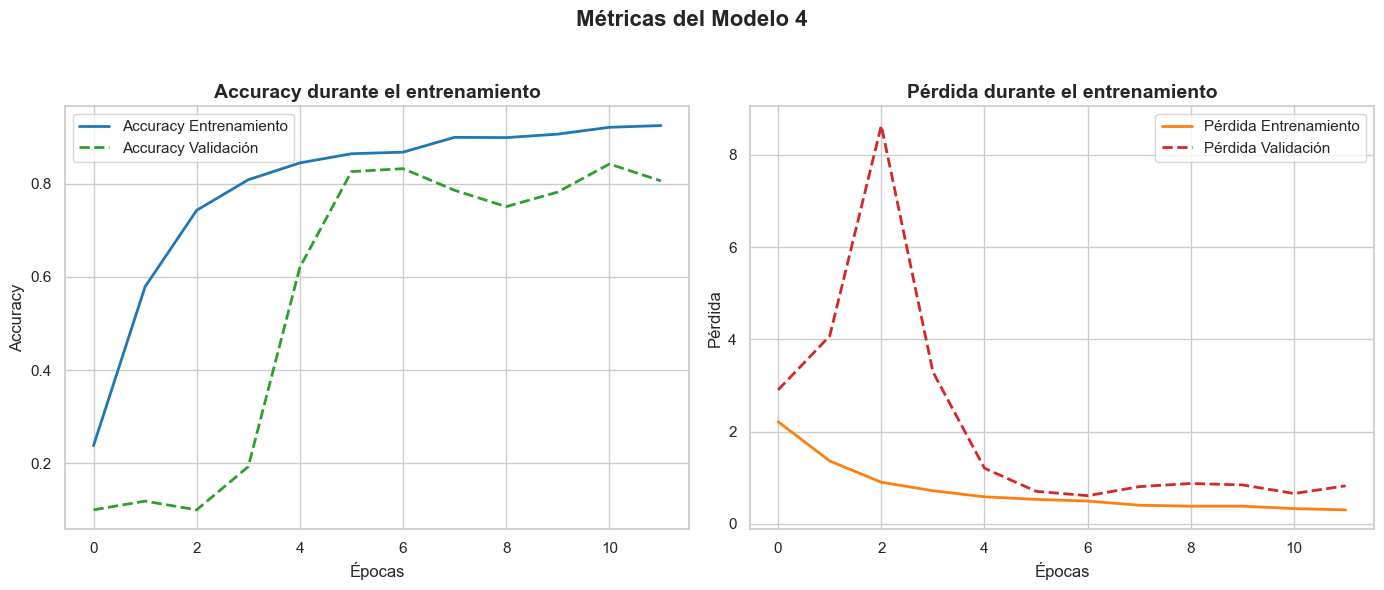

In [26]:
# Evaluar el modelo en el conjunto de validación
test_loss, validation_accuracy = model4.evaluate(val_data_gen)
print(f"\nAccuracy en el conjunto de validación: {validation_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(history4.history['val_accuracy'], label='Accuracy Validación', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(history4.history['val_loss'], label='Pérdida Validación', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo 4', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Modelo 5 (agregamos 1 capa de Dropout de 0.3, 50 epochs + ReduceLROnPlateau)

In [5]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Definir la arquitectura del modelo
model5 = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

# Configurar callbacks: EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=3,  # Reducir si no mejora en 3 épocas consecutivas
    min_lr=1e-5  # Límite inferior para la tasa de aprendizaje
)

# Entrenar el modelo con los callbacks
history5 = model5.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,  
    callbacks=[early_stop, lr_scheduler] 
)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,674 (2.36 MB)

 Trainable params: 617,674 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 389ms/step - accuracy: 0.1616 - loss: 2.2223 - val_accuracy: 0.6131 - val_loss: 1.5083 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 377ms/step - accuracy: 0.5103 - loss: 1.4614 - val_accuracy: 0.6822 - val_loss: 1.0878 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 380ms/step - accuracy: 0.6468 - loss: 1.0361 - val_accuracy: 0.7864 - val_loss: 0.8336 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 353ms/step - accuracy: 0.7523 - loss: 0.7608 - val_accuracy: 0.8078 - val_loss: 0.6863 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 346ms/step - accuracy: 0.8021 - loss: 0.6040 - val_accuracy: 0.8166 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.8464 - loss: 0.4705 - val_accuracy: 0.8405 - val_loss: 0.5540 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.8

In [6]:
# Guardar el modelo
model5.save('model5.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.8496 - loss: 0.5732

Accuracy en el conjunto de validación: 0.86


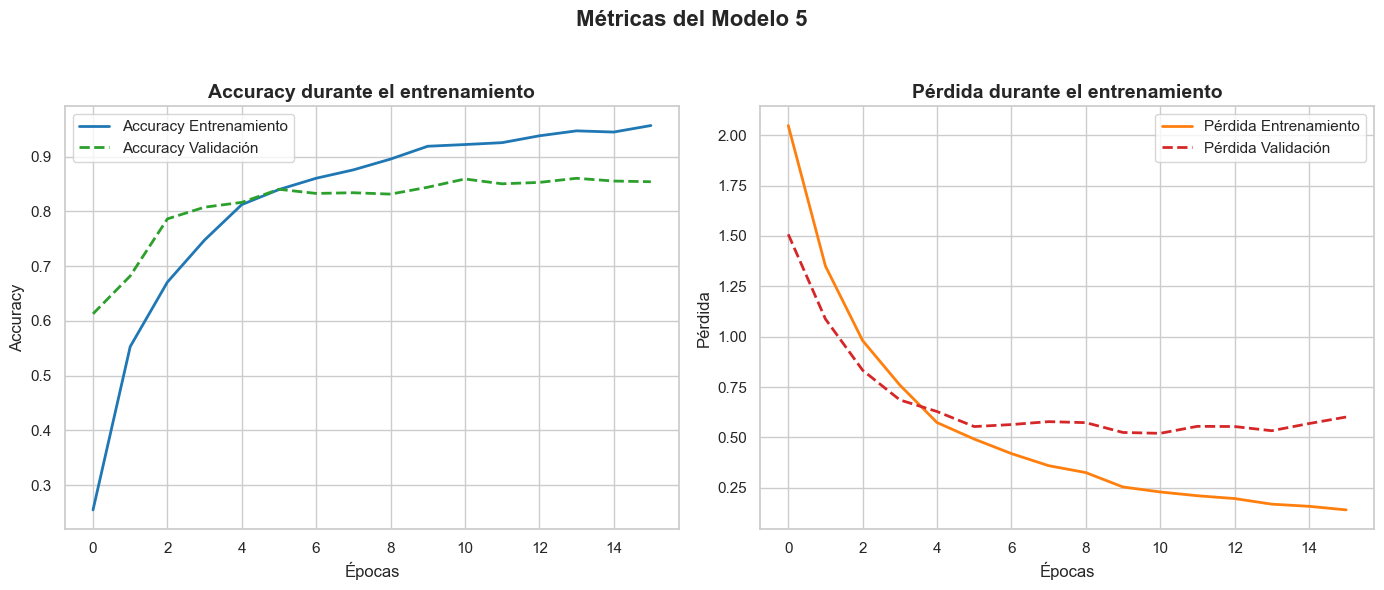

In [7]:
# Evaluar el modelo en el conjunto de validación
test_loss, validation_accuracy = model5.evaluate(val_data_gen)
print(f"\nAccuracy en el conjunto de validación: {validation_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(history5.history['val_accuracy'], label='Accuracy Validación', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(history5.history['val_loss'], label='Pérdida Validación', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo 5', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Viendo los resultados de accuracy en validación, el mejor modelo es el modelo 3... con 0.87 de accuracy. Entrenamos el modelo con todos los datos y probamos en Test.

In [8]:
# Generador de datos para entrenamiento (sin val split)
train_data_full = image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical',
    shuffle=False
)

Found 3996 images belonging to 10 classes.


In [9]:
modelWin = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 clases de salida
])

# Configurar el optimizador Adam
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
modelWin.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
modelWin.summary()

# Configurar callbacks: EarlyStopping y ReduceLROnPlateau
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5,  # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reducir la tasa de aprendizaje a la mitad
    patience=3,  # Reducir si no mejora en 3 épocas consecutivas
    min_lr=1e-5  # Límite inferior para la tasa de aprendizaje
)

# Entrenar el modelo con los callbacks
historyWin = modelWin.fit(
    train_data_full,
    validation_data= test_data_gen,
    epochs=50,  
    callbacks=[early_stop, lr_scheduler] 
)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\regin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 295ms/step - accuracy: 0.0797 - loss: 2.3431 - val_accuracy: 0.1069 - val_loss: 2.3024 - learning_rate: 0.0010
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - accuracy: 0.0885 - loss: 2.3042 - val_accuracy: 0.1031 - val_loss: 2.2944 - learning_rate: 0.0010
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 300ms/step - accuracy: 0.1182 - loss: 2.2930 - val_accuracy: 0.2871 - val_loss: 2.0339 - learning_rate: 0.0010
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - accuracy: 0.2730 - loss: 2.0364 - val_accuracy: 0.4191 - val_loss: 1.6581 - learning_rate: 0.0010
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 323ms/step - accuracy: 0.4103 - loss: 1.6825 - val_accuracy: 0.5829 - val_loss: 1.2766 - learning_rate: 0.0010
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 349ms/step - accuracy: 0.5337 - loss: 1.3991 - val_accuracy: 0.6281 - val_loss: 1.1335 - learning_rate: 0.0010
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 343ms/step - accuracy: 0.6

In [10]:
# Guardar el modelo
modelWin.save('modelWin.h5')

33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 337ms/step - accuracy: 0.9110 - loss: 0.3172

Accuracy en el conjunto de prueba: 0.91


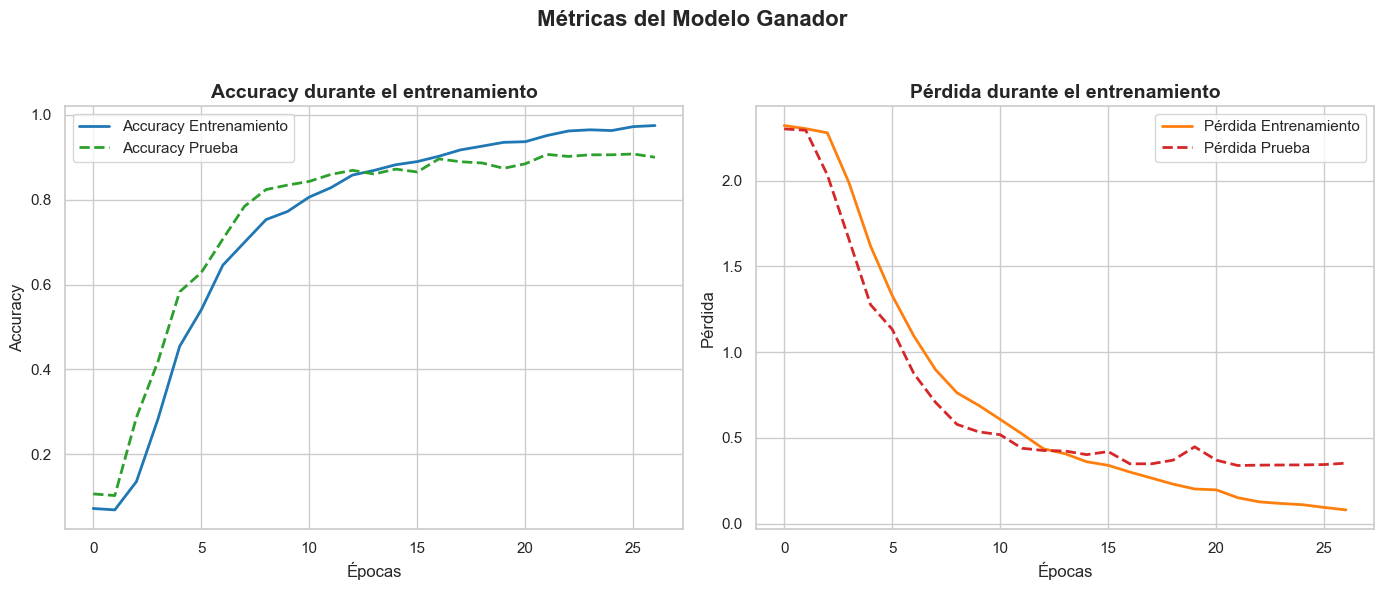

In [11]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelWin.evaluate(test_data_gen)
print(f"\nAccuracy en el conjunto de prueba: {test_accuracy:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style='whitegrid')

# Definir una paleta de colores más atractiva
colors = {
    'train_acc': '#1f77b4',       # azul
    'val_acc': '#2ca02c',         # verde
    'train_loss': '#ff7f0e',      # naranja
    'val_loss': '#d62728'         # rojo
}

# Crear figura
plt.figure(figsize=(14, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(historyWin.history['accuracy'], label='Accuracy Entrenamiento', color=colors['train_acc'], linewidth=2)
plt.plot(historyWin.history['val_accuracy'], label='Accuracy Prueba', color=colors['val_acc'], linestyle='--', linewidth=2)
plt.title('Accuracy durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(historyWin.history['loss'], label='Pérdida Entrenamiento', color=colors['train_loss'], linewidth=2)
plt.plot(historyWin.history['val_loss'], label='Pérdida Prueba', color=colors['val_loss'], linestyle='--', linewidth=2)
plt.title('Pérdida durante el entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Layout general
plt.suptitle('Métricas del Modelo Ganador', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Obtuvimos 91% de accuracy en el de TEST

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 382ms/step


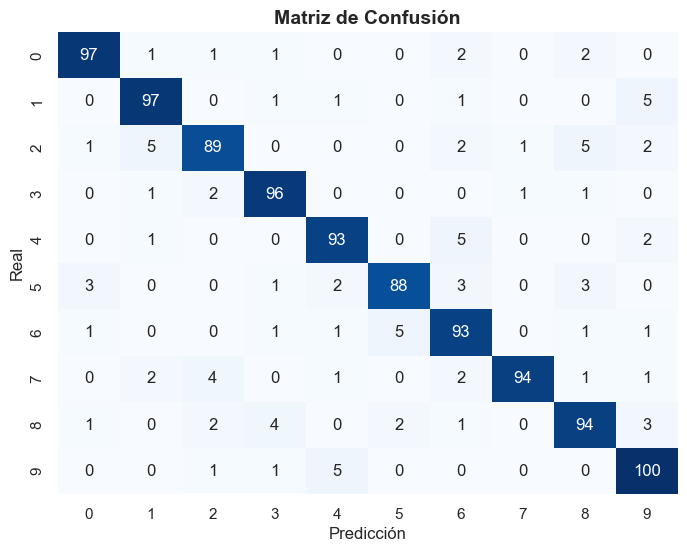

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       104
           1       0.91      0.92      0.92       105
           2       0.90      0.85      0.87       105
           3       0.91      0.95      0.93       101
           4       0.90      0.92      0.91       101
           5       0.93      0.88      0.90       100
           6       0.85      0.90      0.88       103
           7       0.98      0.90      0.94       105
           8       0.88      0.88      0.88       107
           9       0.88      0.93      0.90       107

    accuracy                           0.91      1038
   macro avg       0.91      0.91      0.91      1038
weighted avg       0.91      0.91      0.91      1038



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener etiquetas verdaderas directamente
y_true = test_data_gen.classes

# Predecir probabilidades y convertir a clases predichas
y_pred_probs = modelWin.predict(test_data_gen, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
conf_mat = confusion_matrix(y_true, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.show()

# Métricas generales
print("Reporte de clasificación:\n")
print(classification_report(y_true, y_pred))